<a href="https://colab.research.google.com/github/SrihariniRajasekaran/fullstack/blob/main/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2024-01-03 06:09:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 172.253.123.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   229MB/s    in 2.2s    

2024-01-03 06:09:49 (229 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref =zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


In [ ]:
import os
for dirpath,dirnames,filenames in os.walk ("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

there are 2 directories and 0 images in 10_food_classes_all_data.
there are 10 directories and 0 images in 10_food_classes_all_data/train.
there are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
there are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
there are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
there are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
there are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
there are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
there are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
there are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
there are 10 directorie

In [ ]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir =pathlib.Path(train_dir)
class_name=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
def view_rand_img(target_dir,target_class):
 target_folder=target_dir+target_class
 random_image=random.sample(os.listdir(target_folder),1)
 img=mping.imread(target_folder +"/" + random_image[0])
 plt.imshow(img)
 plt.title(target_class)
 plt.axis("off");
 print(f"image shape:{img.shape}")
 return img

image shape:(512, 512, 3)


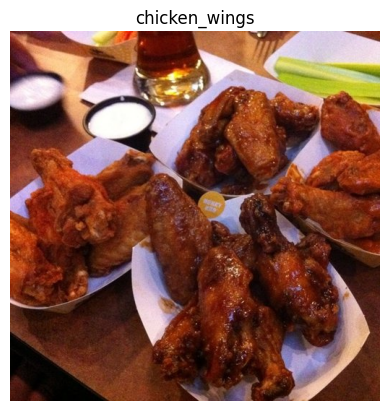

In [ ]:
import random
img=view_rand_img(target_dir=train_dir,target_class=random.choice(class_name))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')])
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 601s 3s/step - loss: 2.2819 - accuracy: 0.1220 - val_loss: 2.1715 - val_accuracy: 0.2024
Epoch 2/5
235/235 [==============================] - 603s 3s/step - loss: 2.1780 - accuracy: 0.1984 - val_loss: 2.0685 - val_accuracy: 0.2560
Epoch 3/5
235/235 [==============================] - 609s 3s/step - loss: 2.0897 - accuracy: 0.2443 - val_loss: 1.9717 - val_accuracy: 0.3068
Epoch 4/5
235/235 [==============================] - 622s 3s/step - loss: 2.0390 - accuracy: 0.2779 - val_loss: 1.9166 - val_accuracy: 0.3356
Epoch 5/5
235/235 [==============================] - 609s 3s/step - loss: 1.9998 - accuracy: 0.2911 - val_loss: 1.8749 - val_accuracy: 0.3584


In [ ]:
model.evaluate(test_data)

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

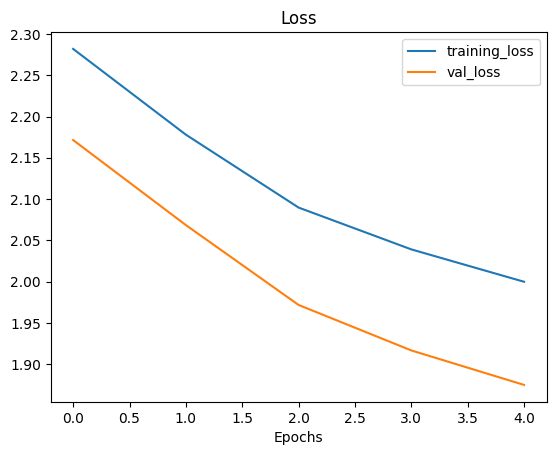

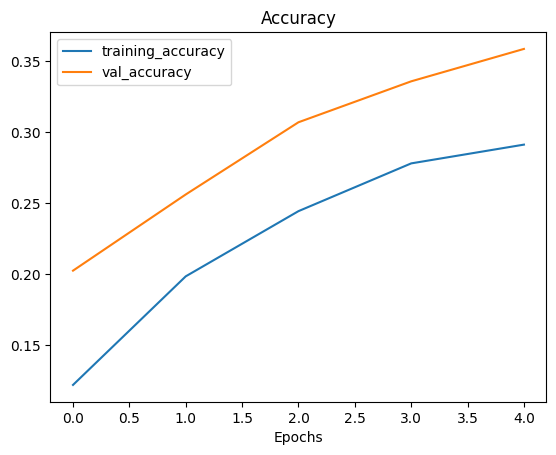

In [ ]:
plot_loss_curves(history)